In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('SMA 1-3 Dataset.csv') 
df.head(5)

,Post_ID,Post_Date,Content_Type,Content,Hashtags,Location,Likes,Comments,Shares,Followers,Mentioned_Entities
0,1,01-04-2025,Text,"""Loving the weather today!""",#weather #sunny,New York,120,10,5,1500,@user123
1,2,02-04-2025,Image,"""Check out this amazing sunset!""",#sunset #beautiful,Los Angeles,230,20,10,2000,@sunlover
2,3,02-04-2025,Video,"""How to make a perfect coffee""",#coffee #tutorial,Chicago,150,30,15,1800,@coffeeaddict
3,4,03-04-2025,Text,"""Just finished a 5K run!""",#fitness #running,New York,180,40,20,1700,@runwithme
4,5,03-04-2025,Image,"""Delicious homemade pizza!""",#foodie #pizza,Miami,300,50,30,2200,@foodiegram


Top 10 Keywords: ['amazing' 'coffee' 'exploring' 'finished' 'just' 'pizza' 'plan' 'project'
 'routine' 'workout']


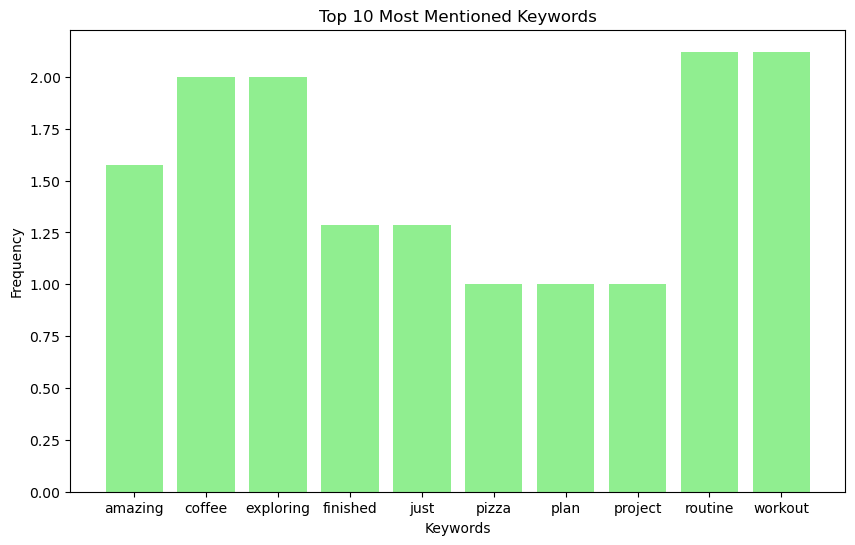

In [19]:
# Create a CountVectorizer to extract keywords
vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(df['Content'])

# Get the top 10 most frequent keywords
keywords = vectorizer.get_feature_names_out()

print("Top 10 Keywords:", keywords)

# Visualizing the most frequent keywords
keyword_counts = X.sum(axis=0).A1  # Sum of word frequencies across all documents
plt.figure(figsize=(10, 6))
plt.bar(keywords, keyword_counts, color='lightgreen')
plt.title('Top 10 Most Mentioned Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.show()

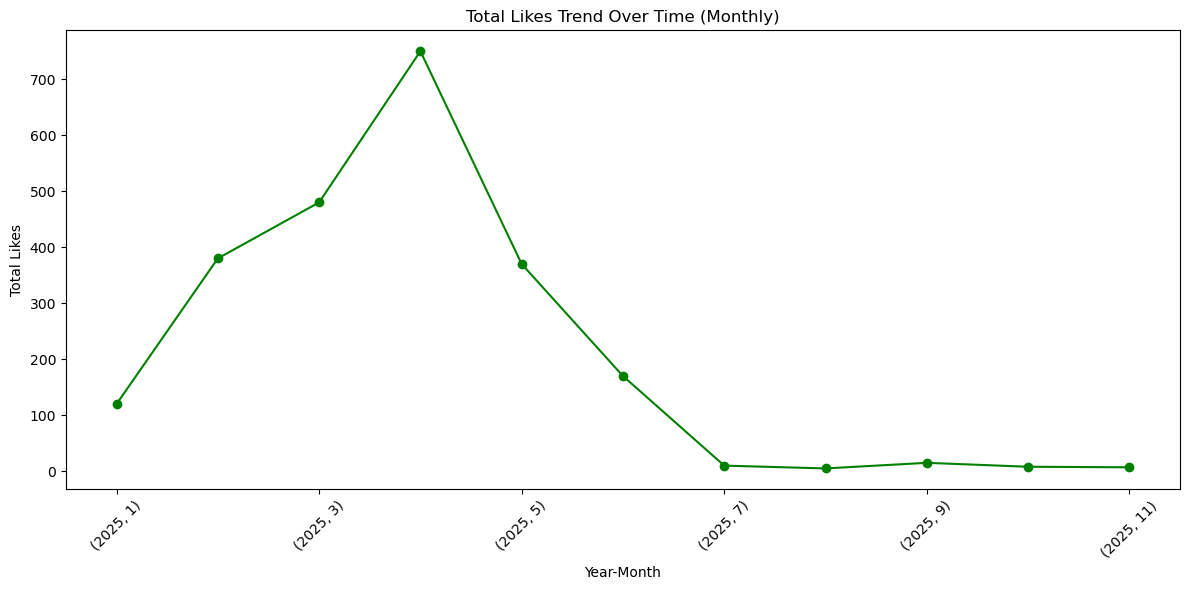

In [21]:
# Convert 'Post_Date' to datetime format
df['Post_Date'] = pd.to_datetime(df['Post_Date'])

# Extract year, month, and day for trend analysis
df['Year'] = df['Post_Date'].dt.year
df['Month'] = df['Post_Date'].dt.month
df['Day'] = df['Post_Date'].dt.day

# 1. Trend of Total Likes over Time (Monthly)
monthly_engagement = df.groupby(['Year', 'Month'])['Likes'].sum()

# Plotting Total Likes over Time (Monthly)
plt.figure(figsize=(12, 6))
monthly_engagement.plot(kind='line', marker='o', color='green')
plt.title('Total Likes Trend Over Time (Monthly)')
plt.xlabel('Year-Month')
plt.ylabel('Total Likes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

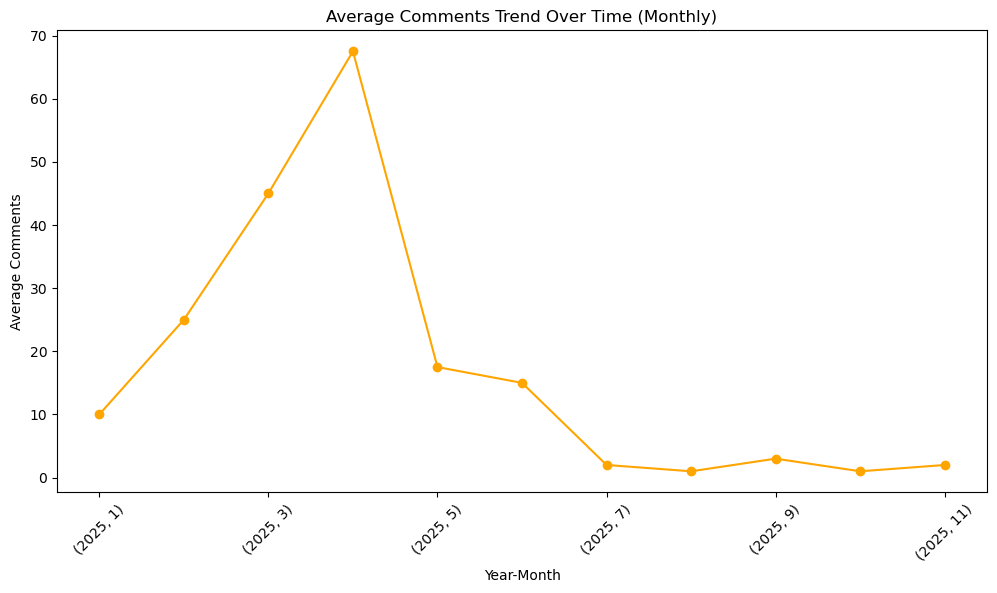

In [23]:
# 2. Trend of Average Comments over Time (Monthly)
monthly_comments = df.groupby(['Year', 'Month'])['Comments'].mean()

# Plotting Average Comments over Time (Monthly)
plt.figure(figsize=(12, 6))
monthly_comments.plot(kind='line', marker='o', color='orange')
plt.title('Average Comments Trend Over Time (Monthly)')
plt.xlabel('Year-Month')
plt.ylabel('Average Comments')
plt.xticks(rotation=45)
plt.show()

Top 10 Hashtags: workout       3
coffee        2
fitness       2
weather       1
morning       1
angry         1
stress        1
delayed       1
frustrated    1
bored         1
Name: count, dtype: int64


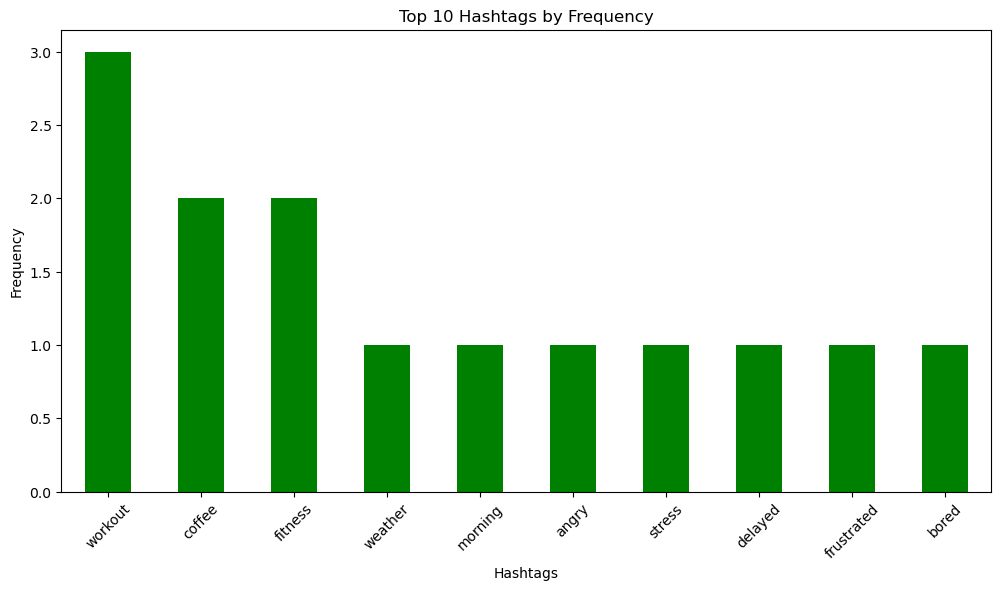

In [25]:
# 3. Trend of Total Likes over Hashtags
# Ensure Hashtags are treated properly (handle missing or NaN values)
df['Hashtags'] = df['Hashtags'].fillna('')  # Handle NaN values

# Split the hashtags by spaces (or other delimiters), convert to lowercase, and strip extra spaces
hashtags = df['Hashtags'].str.lower().str.split('#').sum()  # Split by '#' and flatten the list

# Clean up the hashtags by removing empty strings
hashtags = [hashtag.strip() for hashtag in hashtags if hashtag.strip() != '']

# Count the frequency of each hashtag
hashtag_counts = pd.Series(hashtags).value_counts()

# Display the top 10 hashtags
print("Top 10 Hashtags:", hashtag_counts.head(10))

# Plotting the Total Likes by Hashtag (Top 10 Hashtags)
plt.figure(figsize=(12, 6))
hashtag_counts.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Hashtags by Frequency')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()